In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust import *
from newdust.halos import *

from scipy.integrate import trapz

In [3]:
NE, NTH = 10, 200
EVALS   = np.logspace(-1, 1, NE)   # keV
THVALS  = np.logspace(-1, 4, NTH)  # arcsec
GPOP    = grainpop.make_MRN_drude()['RGD']

In [4]:
uni_halo = Halo(EVALS, THVALS, unit='kev')
scr_halo = Halo(EVALS, THVALS, unit='kev')

In [5]:
galhalo.uniformISM(uni_halo, GPOP)

[]

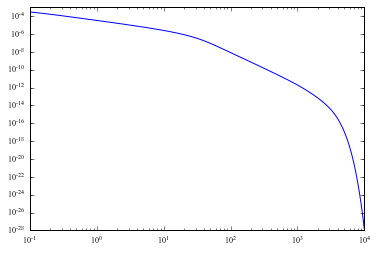

In [6]:
plt.plot(THVALS, uni_halo.norm_int[-1,:])
plt.loglog()

In [7]:
alph_grid = np.repeat(THVALS.reshape(1, NTH), NE, axis=0)
int_halo  = trapz(uni_halo.norm_int * 2.0 * np.pi * alph_grid, THVALS, axis=1)

[]

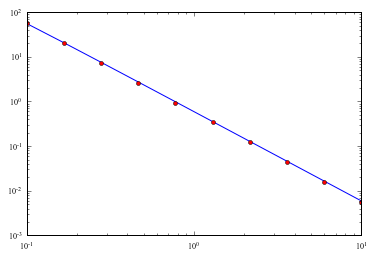

In [8]:
plt.plot(EVALS, int_halo)
plt.plot(EVALS, uni_halo.taux, 'ro')
plt.loglog()

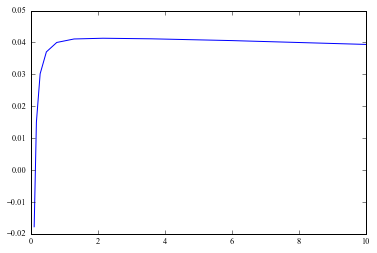

In [9]:
plt.plot(EVALS, int_halo/uni_halo.taux-1.0)